# Mann-Whitney U test (a.k.a. Wilcoxon-Mann-Whitney test)
* A nonparametric test.
* It does not have a gaussian/normal distribution.
* Use in comparing 2 groups only.
* The parametric counter part is the student t-test.
* There should be at least 20 observations in each group.
* $H_0$: There is no difference between the distribution of the 2 groups.
* $H_1$: There is a difference between the distribution of the 2 groups.
* $\alpha = 0.05$


In [ ]:
# Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Load your dataset

framingham = pd.read_csv('Framingham.csv')
framingham.head()

,Patient_ID,Age_Years,Sex,Systolic,Diastolic,CHD,FollowUp_Months,BMI,month,scl
0,563,36,1,108,78,0,11688,29.000000,2,115
1,4080,42,0,110,70,1,7697,24.100000,11,117
2,2264,38,0,84,56,0,11688,21.100000,6,118
3,1870,47,0,144,80,0,11688,25.299999,5,121
4,3137,60,1,122,88,0,4264,32.000000,9,124


## Perform summary statistics on the dataset

In [ ]:
# Convert observations in Patient_ID as string
framingham['Patient_ID'] = framingham['Patient_ID'].apply(str)

# Convert observations in Sex as categorical/string
framingham['Sex'] = framingham['Sex'].apply(str)

# Convert observations in CHD as categorical/string
framingham['CHD'] = framingham['CHD'].apply(str)

# Rename/simplify column name
framingham = framingham.rename(columns = {'Age_Years':'Age', 'FollowUp_Months':'FollowUp','scl':'Cholesterol'})

framingham.describe()

,Age,Systolic,Diastolic,FollowUp,BMI,month,Cholesterol
count,4699.000000,4699.000000,4699.000000,4699.000000,4690.000000,4699.000000,4699.000000
mean,46.041073,132.766546,82.541605,8061.313258,25.631706,6.369227,229.087253
std,8.504363,22.801104,12.737322,3595.310856,4.094672,3.683821,45.381863
min,30.000000,80.000000,40.000000,18.000000,16.200001,1.000000,115.000000
25%,39.000000,116.000000,74.000000,5136.500000,22.799999,3.000000,198.000000
50%,45.000000,130.000000,80.000000,8908.000000,25.200001,6.000000,225.000000
75%,53.000000,144.000000,90.000000,11648.000000,28.000000,10.000000,255.000000
max,68.000000,270.000000,148.000000,11688.000000,57.599998,12.000000,568.000000


## Create histogram

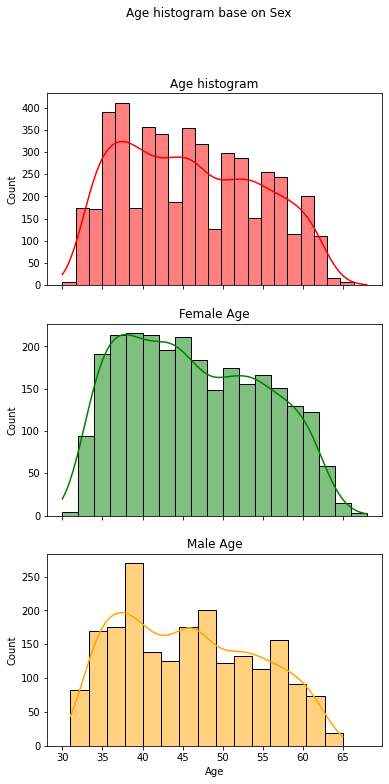

In [ ]:
# Create subset for female and male
FemaleAge = framingham[(framingham['Sex'] == '0')]
MaleAge = framingham[(framingham['Sex'] == '1')]

# Create figure and title
fig, axs = plt.subplots(3, 1, figsize=(6, 12), sharex=True)
fig.suptitle('Age histogram base on Sex')

# Age historgram of both female and male
sns.histplot(framingham['Age'], ax=axs[0], kde=True, color='red')
axs[0].set_title('Age histogram')

# Female Age
sns.histplot(FemaleAge['Age'], ax=axs[1], kde=True, color='green')
axs[1].set_title('Female Age')

# Male Age
sns.histplot(MaleAge['Age'], ax=axs[2], kde=True, color='orange')
axs[2].set_title('Male Age')

plt.show()

This histogram of the groups do not have a normal distribution curve.

## Perform Mann-Whitney U test


In [ ]:
FemaleAge = FemaleAge['Age']
MaleAge = MaleAge['Age']

In [ ]:
from scipy.stats import mannwhitneyu

MWU, pval = mannwhitneyu(FemaleAge, MaleAge)
MWU, pval

(2636976.5, 0.045394132421248456)

## Interpret the result
The result of our p-value is 0.045 which is less than 0.05. We will reject the null hypothesis. There is a significant difference between the age of female and male.